In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")


# Load Data

In [3]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_final = pd.read_csv('sample_submission.csv')


# EDA
1. Dataset overview

2. Univariate analysis - Numeric Features
    - Distribution plots (hist and box)
    - Describe
    - Outliers 

3. Univariate analysis - Categorical Features
    - Most common values with percentages
    - Countplot with labels
    - Unique values 

4. Bivariate/Multivariate analysis
    - Numeric-numeric : Correlation matrix, scatterplots (for high correlation), pairplots for smaller features
    - Categorical-categorical : 
    - Numerical-categorical: Boxplot/violin plots

5. Data quality checks
    - Missing values
    - Duplicated values
    - Inconsistencies
    - Feature engineering recommendations


# Dataset Overview
    - shape
    - info
    - missing values
    - duplicated values
    - head, tail, sample

In [4]:
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

Rows: 188533
Columns: 13


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [6]:
df.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [7]:
print(f"Duplicated values : {df.duplicated(keep=False).sum()}")
if df.duplicated().sum()>0:
    display(df[df.duplicated(keep=False)].reset_index())

Duplicated values : 0


In [8]:
print("Head:")
display(df.head(3))
print("Tail:")
display(df.tail(3))
print("Sample:")
display(df.sample(3))

Head:


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900


Tail:


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900
188532,188532,Porsche,Macan Base,2016,59500,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,None reported,Yes,28995


Sample:


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
16323,16323,Rolls-Royce,Cullinan,2022,398,Gasoline,6.7L V12 48V GDI DOHC Twin Turbo,8-Speed Automatic,Silver,Charles Blue,None reported,Yes,113000
60679,60679,Ford,F-150 Lariat,2019,62865,Gasoline,325.0HP 2.7L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Blue,Black,None reported,Yes,31000
156299,156299,Mercedes-Benz,AMG C 63 Base,2020,12758,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,9-Speed A/T,Black,Black,None reported,Yes,46900


In [9]:
num_cols = df.select_dtypes(include=['int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
print(f"Numerical Datatypes: {num_cols}")
print(f"Categorical Datatypes: {cat_cols}")

Numerical Datatypes: Index(['id', 'model_year', 'milage', 'price'], dtype='object')
Categorical Datatypes: Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident', 'clean_title'],
      dtype='object')


# Observations
1. There are 188533 rows of data and 13 columns
2. There is one id column, and 2 numerical columns
3. The target column is numeric


# Univariate analysis - Numeric Features
    - Distribution plots (hist and box)
    - Describe
    - Outliers 

In [10]:
sns.set_palette("pastel")    
sns.set_theme(style="darkgrid")   

In [11]:
def num_analysis(df,col):
    print(f"****************************** {col} analysis ******************************")

    fig,axs = plt.subplots(1,2,figsize=(10,5))
    axs[0].set_title(f"{col} boxplot")
    axs[0].tick_params(axis='x', rotation=45)
    sns.boxplot(data=df,x=col,ax=axs[0])
    axs[1].set_title(f"{col} histplot")
    axs[1].tick_params(axis='x', rotation=45)

    sns.histplot(data=df,x=col,ax=axs[1],kde=True)
    plt.tight_layout()
    plt.show()

    print(f"********************  {col} values description  ********************")
    display(df[col].describe().to_frame().style.background_gradient(cmap='cool'))

    print(f"********************  {col} outliers  ********************")

    Q3 = df[col].quantile(0.75)
    Q1 = df[col].quantile(0.25)

    print(f"IQR : {Q3 - Q1}")

    upper_outliers = df[df[col] > Q3]
    lower_outliers = df[df[col] < Q1]

    if len(upper_outliers)>0:
        print(f"****** Upper Outliers ******")
        print(f"Upper outlier count: {len(upper_outliers)}")
        display(upper_outliers.head(3))
    
    if len(lower_outliers)>0:
        print(f"****** Lower Outliers ******")
        print(f"Lower outlier count: {len(lower_outliers)}")
        display(lower_outliers.head(3))

    
    print("")
    print("")
    print("")
    print("")



In [12]:
num_cols_for_analysis = num_cols.drop('id')

****************************** model_year analysis ******************************


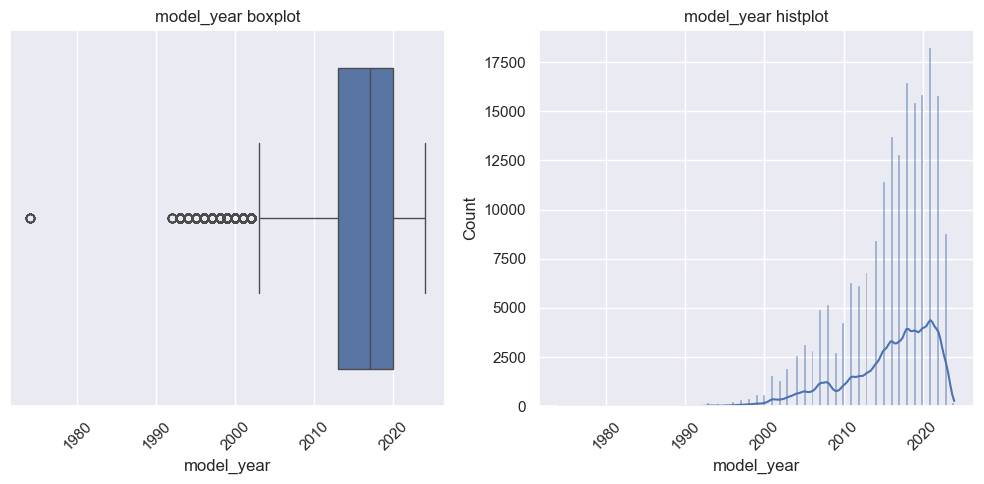

********************  model_year values description  ********************


,model_year
count,188533.000000
mean,2015.829998
std,5.660967
min,1974.000000
25%,2013.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


********************  model_year outliers  ********************
IQR : 7.0
****** Upper Outliers ******
Upper outlier count: 42878


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
14,14,Land,Rover Range Rover P530 SE SWB,2023,20000,Gasoline,523.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,56900
16,16,GMC,Yukon Denali,2021,15000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,10-Speed A/T,Green,Beige,None reported,Yes,68500


****** Lower Outliers ******
Lower outlier count: 44894


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900






****************************** milage analysis ******************************


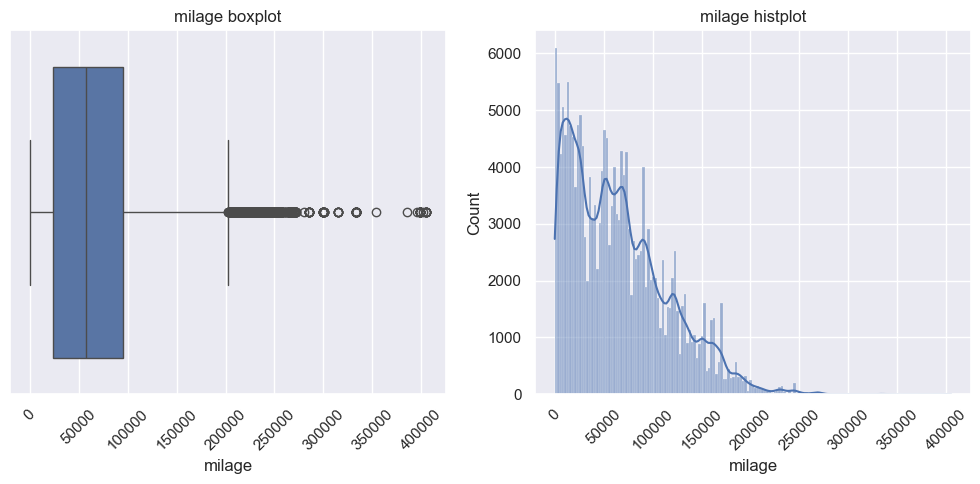

********************  milage values description  ********************


,milage
count,188533.000000
mean,65705.295174
std,49798.158076
min,100.000000
25%,24115.000000
50%,57785.000000
75%,95400.000000
max,405000.000000


********************  milage outliers  ********************
IQR : 71285.0
****** Upper Outliers ******
Upper outlier count: 47113


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900


****** Lower Outliers ******
Lower outlier count: 47072


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
14,14,Land,Rover Range Rover P530 SE SWB,2023,20000,Gasoline,523.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,56900






****************************** price analysis ******************************


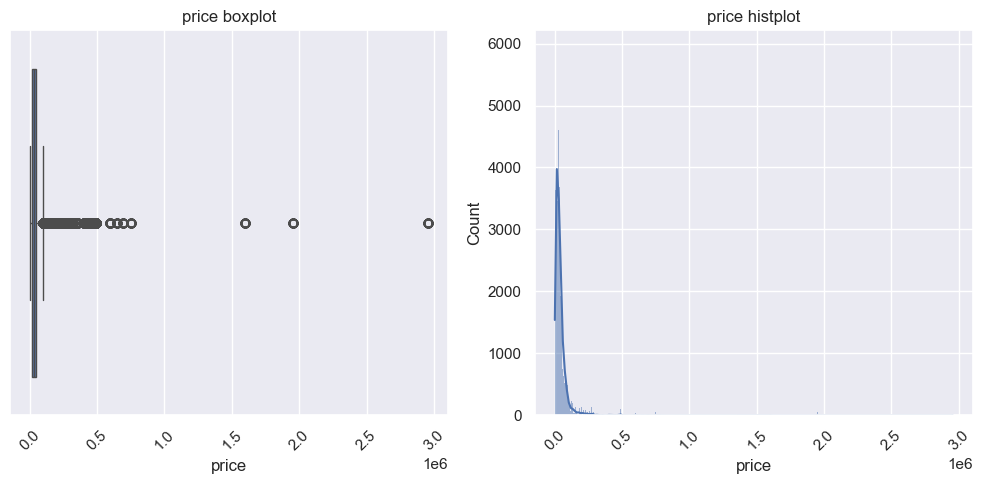

********************  price values description  ********************


,price
count,188533.000000
mean,43878.016178
std,78819.522254
min,2000.000000
25%,17000.000000
50%,30825.000000
75%,49900.000000
max,2954083.000000


********************  price outliers  ********************
IQR : 32900.0
****** Upper Outliers ******
Upper outlier count: 46858


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
8,8,Ford,F-150 XLT,2020,38352,Gasoline,2.7L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Snowflake White Pearl Metallic,Black,None reported,Yes,62890
12,12,Cadillac,Escalade ESV Platinum,2017,93971,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Black,None reported,Yes,51500


****** Lower Outliers ******
Lower outlier count: 46816


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900


In [13]:
for col in num_cols_for_analysis:
    num_analysis(df,col)

# Univariate analysis - Categorical Features
- Value counts
- Unique values
- Bar chart

In [14]:
def categorical_analysis(df,col):
    print(f"****************************** {col} analysis ******************************")
    
    print(f"Number of Unique Values: {df[col].nunique()}")
    if df[col].nunique() < 10:
        fig = plt.Figure(figsize=(10,5))
        plt.xticks(rotation=45)
        plt.title("Value Distribution")
        sns.histplot(data=df,x=col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Top values for {col}")
        display(df[col].value_counts().reset_index().head(5))

    print("")
    print("")

****************************** brand analysis ******************************
Number of Unique Values: 57
Top values for brand


,brand,count
0,Ford,23088
1,Mercedes-Benz,19172
2,BMW,17028
3,Chevrolet,16335
4,Audi,10887




****************************** model analysis ******************************
Number of Unique Values: 1897
Top values for model


,model,count
0,F-150 XLT,2945
1,M3 Base,2229
2,Camaro 2SS,1709
3,M4 Base,1622
4,Mustang GT Premium,1526




****************************** fuel_type analysis ******************************
Number of Unique Values: 7


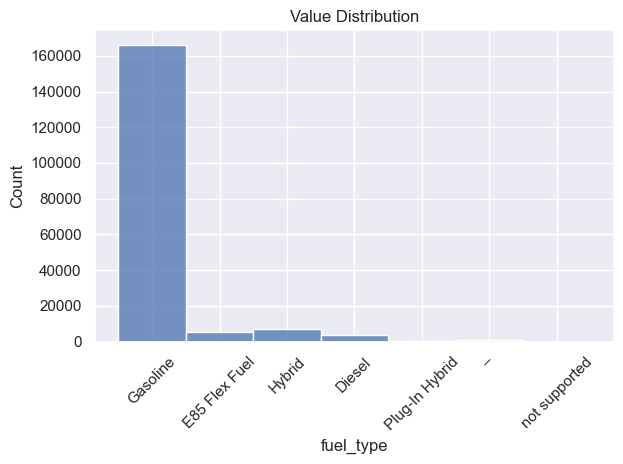



****************************** engine analysis ******************************
Number of Unique Values: 1117
Top values for engine


,engine,count
0,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,3462
1,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,2902
2,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,2841
3,2.0L I4 16V GDI DOHC Turbo,2680
4,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,2451




****************************** transmission analysis ******************************
Number of Unique Values: 52
Top values for transmission


,transmission,count
0,A/T,49904
1,8-Speed A/T,20645
2,Transmission w/Dual Shift Mode,19255
3,6-Speed A/T,18044
4,6-Speed M/T,11998




****************************** ext_col analysis ******************************
Number of Unique Values: 319
Top values for ext_col


,ext_col,count
0,Black,48658
1,White,43815
2,Gray,25293
3,Silver,16995
4,Blue,14555




****************************** int_col analysis ******************************
Number of Unique Values: 156
Top values for int_col


,int_col,count
0,Black,107674
1,Beige,24495
2,Gray,21204
3,Brown,5810
4,Red,5145




****************************** accident analysis ******************************
Number of Unique Values: 2


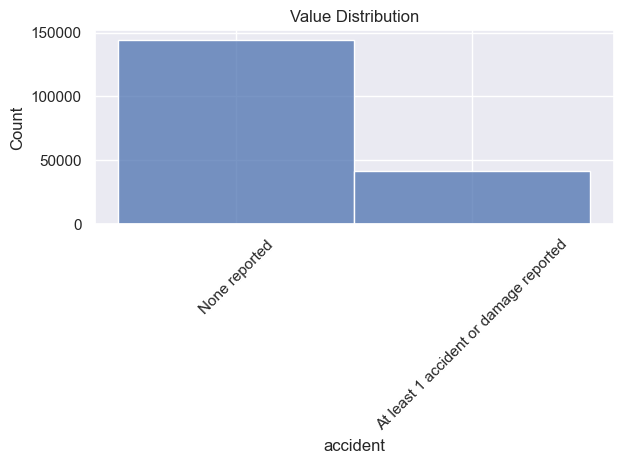



****************************** clean_title analysis ******************************
Number of Unique Values: 1


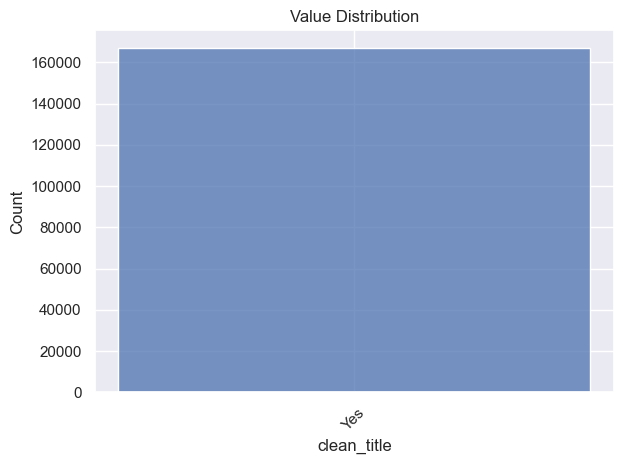

In [15]:
for col in cat_cols:
    categorical_analysis(df,col)

# Observations 
- Clean_title can be removed as there is only one value 
- There are many unique values for engine, transmission, interior/exterior colours, model and brand

In [16]:
df.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

Multivariate Analysis:
1. Which brands make the most money? 
2. Do interior and exterior colour affect the price? 
3. How does fuel type correlate with price?
4. How does a vehicle in an accident affect the price?
5. Does the milage affect the price?
6. Do specific brands tend to create cars of a particular fuel type?
7. How does the age of the car affect the price?


<Axes: title={'center': 'Most Expensive Brands'}, xlabel='brand', ylabel='price'>

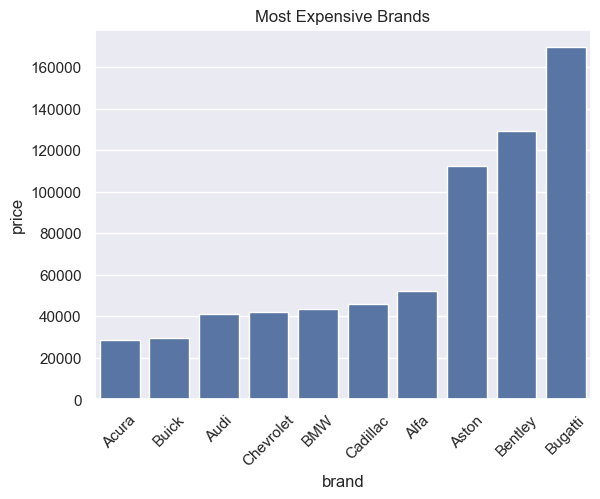

In [17]:
# Which brands make the most money?

df_brands = df.groupby(by='brand')['price'].mean().head(10).sort_values().reset_index()
plt.Figure(figsize=(10,10))
plt.title("Most Expensive Brands")
plt.xticks(rotation = 45)
sns.barplot(data=df_brands,x='brand',y='price')

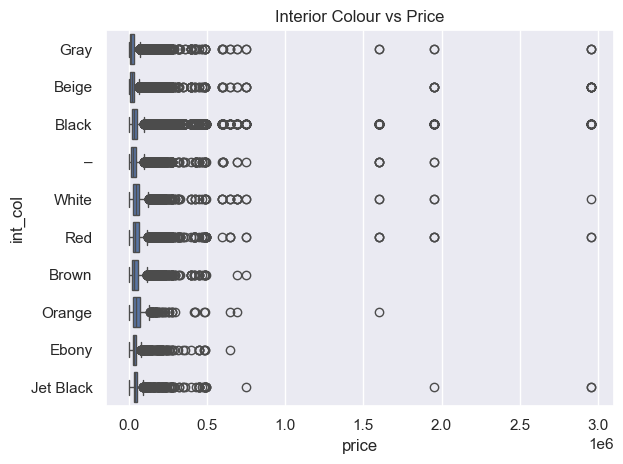

In [18]:
# Do interior or exterior colours affect the price?

top_int_colors = df['int_col'].value_counts().nlargest(10).index
int_col_filtered = df[df['int_col'].isin(top_int_colors)]

plt.Figure(figsize=(12,6))
sns.boxplot(data=int_col_filtered,y='int_col',x='price')
plt.title('Interior Colour vs Price')
plt.tight_layout()
plt.show()

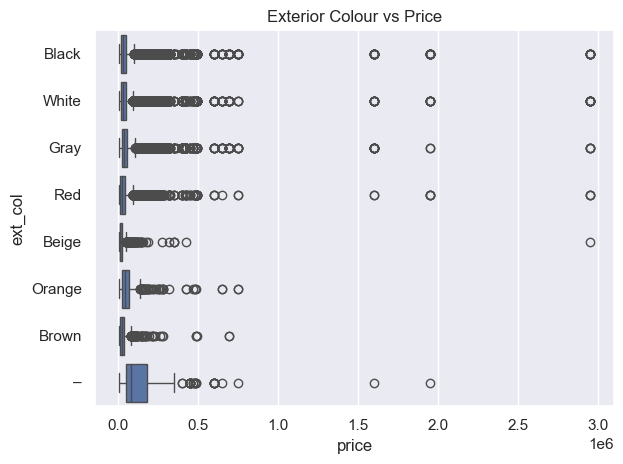

In [19]:
top_ext_colors = df['ext_col'].value_counts().nlargest(10).index
ext_col_filtered = df[df['ext_col'].isin(top_int_colors)]

plt.Figure(figsize=(12,6))
sns.boxplot(data=ext_col_filtered,y='ext_col',x='price')
plt.title('Exterior Colour vs Price')
plt.tight_layout()
plt.show()

In [20]:
# Most popular interior colours 
display(df.groupby('int_col')['price'].agg(['mean','count']).sort_values(by='mean',ascending=False).head(10).reset_index())

,int_col,mean,count
0,Dark Auburn,268591.333333,15
1,Hotspur,257780.844444,45
2,Cobalt Blue,249600.666667,6
3,Beluga Hide,233563.625000,48
4,Linen,224166.555556,27
5,Beluga,205607.200000,10
6,Black / Brown,203085.638889,36
7,Nero Ade,186171.642674,389
8,Sahara Tan,182831.516129,31
9,Portland,174865.392157,51


In [21]:
# Most popular exterior colours
display(df.groupby('ext_col')['price'].agg(['mean','count']).sort_values(by='mean',ascending=False).head(10).reset_index())

,ext_col,mean,count
0,Blue Caelum,396263.600000,5
1,Dark Sapphire,355541.454545,11
2,Bianco Monocerus,300063.076923,13
3,C / C,292528.088235,34
4,Ice,288203.272727,33
5,Tempest,261495.750000,8
6,Beluga Black,222964.363636,77
7,Bianco Icarus Metallic,221547.277778,72
8,GT SILVER,214287.200000,5
9,BLU ELEOS,206435.000000,8


In [22]:
df.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')